---
title: Lecture 1
subtitle: Image Operations
date: 2024-08-22
---

## OpenCV basics

### Import required libraries

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

:::{note}
CV and CV2 are the API versions (not reference to the version of [OpenCV](https://opencv.org/)). CV is the original C code version, whereas CV2 is the C++ version.
:::

### Loading an image

We'll load in an image of the Cathedral of Learning[^cathedral_credit].  The [`imread`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html) function is used to load an image.

[^cathedral_credit]: [Link](https://commons.wikimedia.org/wiki/File:CathedralFromSS.jpg), Credit: Michael G. White, Copyright: © 2007 Michael G. White

In [18]:
cathedral_image = cv2.imread(os.path.relpath('assets/Pitt_Cathedral.jpg'))

Since the image is a 3D [NumPy](https://numpy.org/) array, NumPy attributes such as [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) and [`dtype`](https://numpy.org/doc/stable/reference/arrays.dtypes.html) can be used to obtain information about the image.

In [36]:
# print the size of the image
print("Image size (H, W, channels) is:", cathedral_image.shape)

# print the data-type of the image
print("Data type of the image is:", cathedral_image.dtype)

Image size (H, W, channels) is: (768, 1024, 3)
Data type of the image is: uint8


[Matplotlib](https://matplotlib.org/) can be used to display the image.

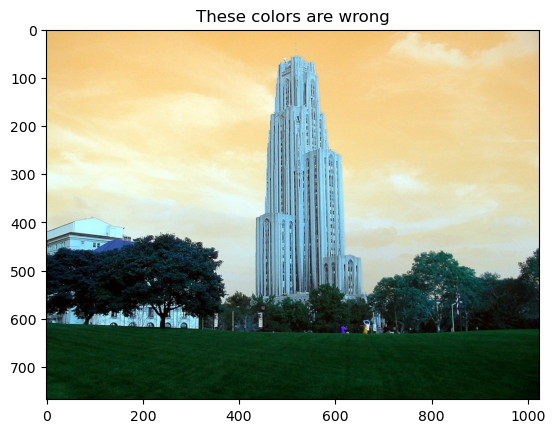

In [19]:
plt.imshow(cathedral_image)
plt.title("These colors are wrong")
plt.show()

:::{warning}
OpenCV uses BGR format as the order of the color channels. Matplotlib uses [RGB](wiki:RGB_color_model), so the colors are in reverse order if we just use the `imshow` function.
:::

### Changing color maps

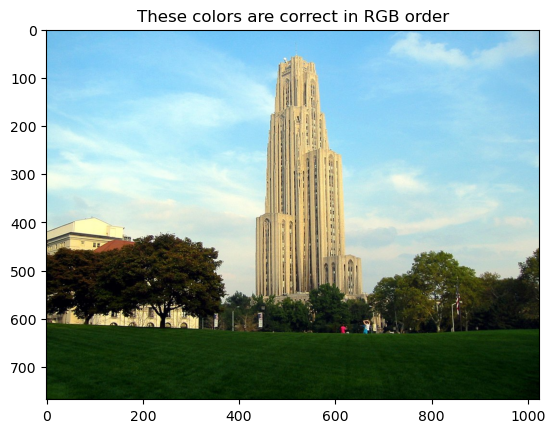

In [20]:
# We have to reverse the color order to get from BGR to RGB
cathedral_image_rgb = cathedral_image[:, :, ::-1]
plt.imshow(cathedral_image_rgb)
plt.title("These colors are correct in RGB order")
plt.show()

:::{note}
OpenCV reads the image in as a 3D Numpy array. The slicing operation `[:, :, ::-1]` means take all the rows, take all the columns, and reverse the channels.
:::

#### Using the split command

A color image is a third order tensor consisting of pixel values along the height, pixel values along the width, and channel values for the pixels.

The `split` command can be used to see each channel separately.

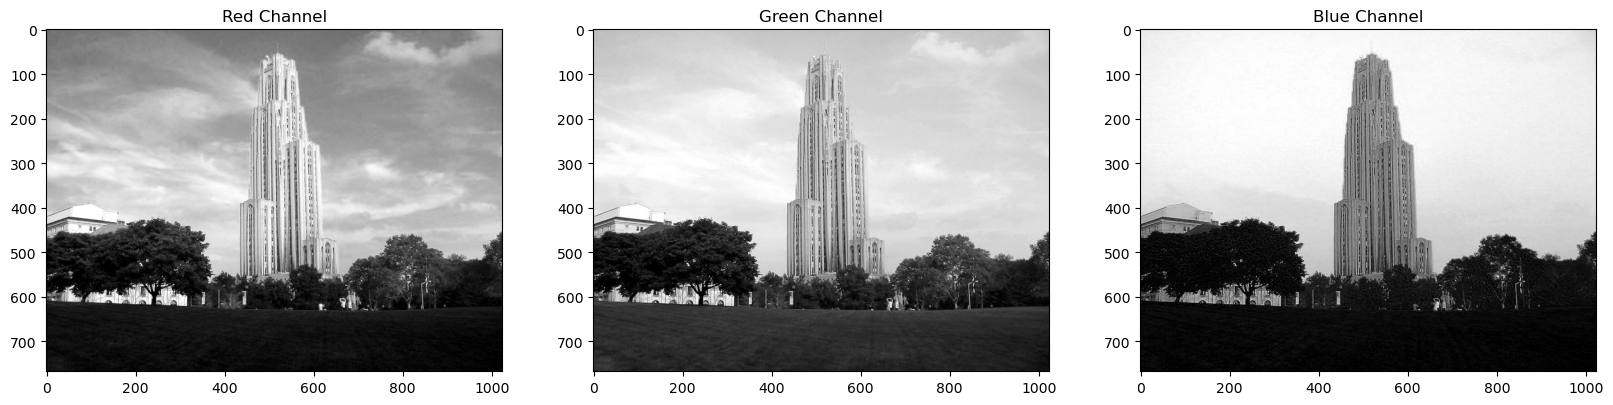

In [26]:
# Split the image into B, G, R components
b, g, r = cv2.split(cathedral_image)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(131); plt.imshow(r, cmap="gray"); plt.title('Red Channel')
plt.subplot(132); plt.imshow(g, cmap="gray"); plt.title('Green Channel')
plt.subplot(133); plt.imshow(b, cmap="gray"); plt.title('Blue Channel')

plt.show()

You can merge the three channels using the `merge` function:

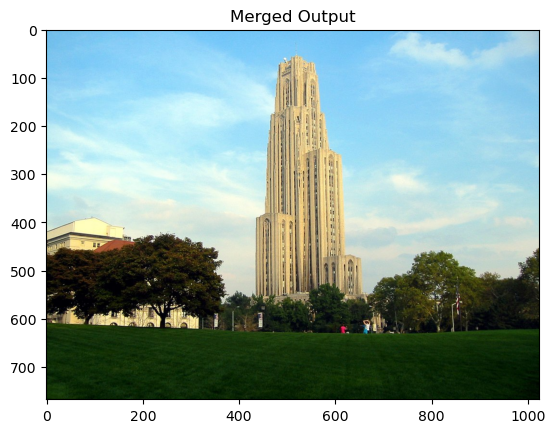

In [23]:
# merge the individual channels
img_merged = cv2.merge((r, g, b))

# Show the merged output
plt.imshow(img_merged)
plt.title('Merged Output')
plt.show()

#### Using cvtColor command

We can also use `cvtColor` to convert the color scheme to [various options](https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0). 

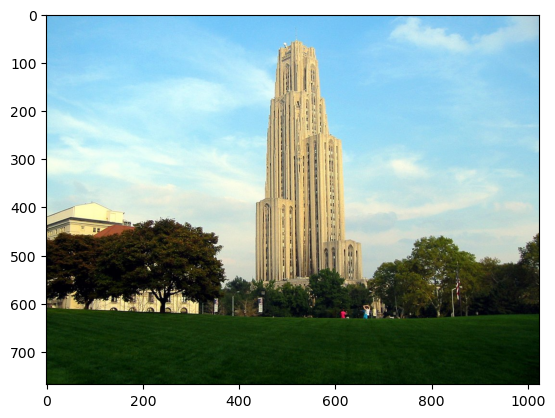

In [25]:
cathedral_image_rgb = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2RGB)
plt.imshow(cathedral_image_rgb)
plt.show()

### HSV color scheme

HSV can be thought of as a radial space, whereas RGB is a cartisean space.

- Hue: The "angle". Imagine the colorwheel.
- Saturation: The "radius". THe center will be white and the edge the deepest of that color.
- Value: The "height". 0 is black/darker version of that color

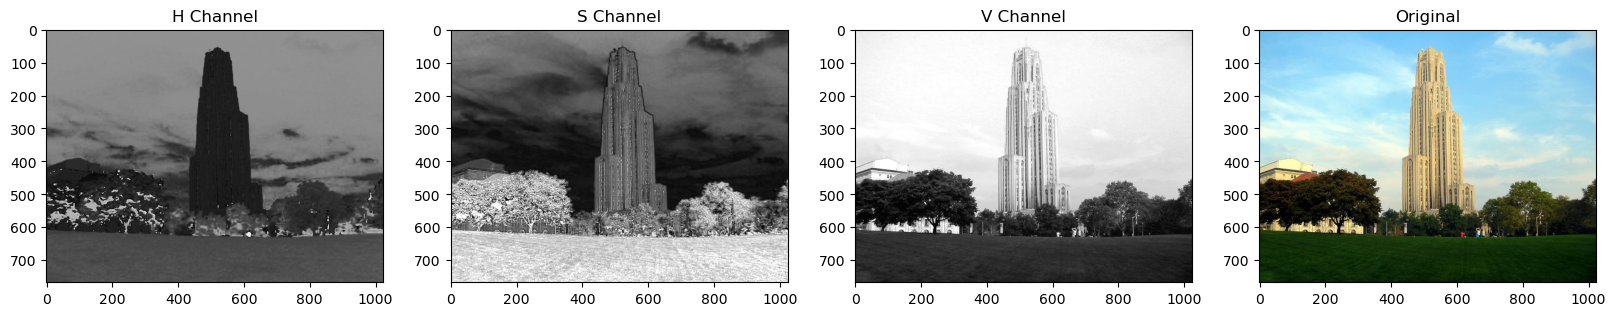

In [28]:
img_hsv = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2HSV)

# Split the image into the H, S, V components
h, s, v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(h, cmap="gray"); plt.title("H Channel")
plt.subplot(142); plt.imshow(s, cmap="gray"); plt.title("S Channel")
plt.subplot(143); plt.imshow(v, cmap="gray"); plt.title("V Channel")
plt.subplot(144); plt.imshow(cathedral_image_rgb); plt.title("Original")
plt.show()

We can edit the values. 

In [29]:
h_new = h + 30
mod_merged_hsv = cv2.merge((h_new, s, v))

:::{important}
We need to convert to RGB for matplotlib to work.
:::

In [31]:
mod_rgb = cv2.cvtColor(mod_merged_hsv, cv2.COLOR_HSV2RGB)

Similarly for the saturation channel:

In [32]:
s_new = s - 20
mod_merged_hsv2 = cv2.merge((h, s_new, v))
mod_rgb2 = cv2.cvtColor(mod_merged_hsv2, cv2.COLOR_HSV2RGB)

Plotting the modified channels:

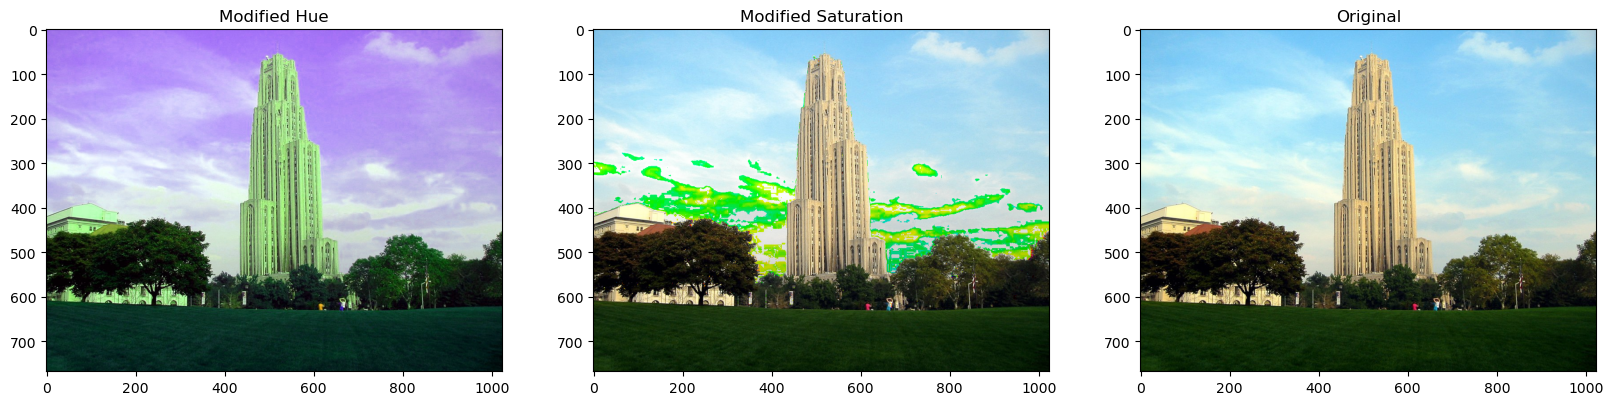

In [33]:
plt.figure(figsize=[20,5])
plt.subplot(131); plt.imshow(mod_rgb); plt.title("Modified Hue")
plt.subplot(132); plt.imshow(mod_rgb2); plt.title("Modified Saturation")
plt.subplot(133); plt.imshow(cathedral_image_rgb); plt.title("Original")
plt.show()

:::{note}
The saturation is showing clipping.
:::

### Saving files

Use `imwrite` to write the image to disk. More information available in the [documentation](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac).

In [34]:
# save the image
cv2.imwrite("cathedral_image_(RGB).png", cathedral_image_rgb);

You can remove files via the following if you don't like clutter:

In [35]:
os.remove("cathedral_image_(RGB).png")